In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data(ending):
    files = ['1','5', '10', '30', '50', '70']
    chunks = []

    for file in files:
        try:
            df = pd.read_csv(f"../../size-results-{file}_10_20mins_{ending}.txt", sep="&")
        except:
            continue

        df.columns = [ x.replace(" ", "") for x in df.columns ]
        df.columns = [ x.replace(".1", "_long") for x in df.columns ]
        df.columns = [ x.replace("\\\\", "_long") for x in df.columns ]

        df['PW10_long'] = df['PW10_long'].str.rstrip(' \\').astype(float)

        df['days'] = int(file)

        chunks.append(df)

    data = pd.concat(chunks)

    data = data.reset_index()

    names = data.columns.values
    names[1] = "network"
    data.columns = names

    # data['days'] = 0
    data['loss'] = ""
    data['size'] = ""
    data['type'] = ""

    for idx, row in data.iterrows():

        network = row.network[:-1]

        if "chd" in network:
            continue

    #     data.loc[idx, 'days'] = int(network[-2:])

        bits = network.split("_")

        data.loc[idx, 'type'] = bits[0]

        data.loc[idx, 'size'] = bits[1]

        if bits[2] == "logcosh":

            data.loc[idx, 'loss'] = "logcosh"
        else:

            if bits[3] == "squared":
                data.loc[idx, 'loss'] = "mean_squared_error"

            else:
                data.loc[idx, 'loss'] = "mean_absolute_error"

    return data

In [3]:
def plot_graphs(to_plot, save=False, filename=""):
    
    for loss, lgroup in to_plot[to_plot['size'] == "small"].groupby("loss"):
    
        if len(loss) < 2:
            continue

        for n_type, tgroup in lgroup.groupby("type"):
            if n_type == "NN":
                n_type = "Baseline"
            plt.plot(tgroup['days'],tgroup['MAPE_long'], label=n_type)
            plt.ylim(15.5,19)

        plt.axhline(y=15.897, c="grey", ls=":", label="Mean of Ave's")
        plt.legend()
        plt.xlabel("Days of Training Data")
        plt.ylabel("MAPE of Long Term Predictions")
        plt.title(f"Exogenous Spatiotemporal Filtering Results\nLoss Function: {loss.replace('_', ' ').title()}")
        if save:
            plt.savefig(f"Exogenous MAPE {loss}_{filename}.pdf", bbox_inches="tight")
        plt.show()

In [22]:
def plot_combos(to_plot_list, names_list, save=False):
    
    loss_plots = {}
    
    for idx, stuff in enumerate(to_plot_list):
        for loss, lgroup in stuff[stuff['size'] == "small"].groupby("loss"):

            if len(loss) < 2:
                continue
                
            if loss not in loss_plots:
                loss_plots[loss] = {}
                print(f"adding: {loss}")

            for n_type, tgroup in lgroup.groupby("type"):
                if n_type == "Combined":
                    loss_plots[loss][names_list[idx]] = {}
                    loss_plots[loss][names_list[idx]]["data"] = tgroup['MAPE_long']
                    loss_plots[loss][names_list[idx]]["days"] = tgroup['days']                
                                     
    for loss in loss_plots:
        for item in loss_plots[loss]:
            plt.plot(loss_plots[loss][item]['days'],loss_plots[loss][item]['data'], label=item)
            if loss == "logcosh":
                plt.ylim(15.5,16)
            else:
                plt.ylim(15.5,18)

        plt.axhline(y=15.897, c="grey", ls=":", label="Mean of Ave's")
        plt.legend()
        plt.xlabel("Days of Training Data")
        plt.ylabel("MAPE of Long Term Predictions")
        plt.title(f"Exogenous Spatiotemporal Filtering Results\nCombined Network\nLoss Function: {loss.replace('_', ' ').title()}")
        if save:
            plt.savefig(f"Exogenous MAPE comparing combos {loss}.pdf", bbox_inches="tight")
        plt.show()

In [31]:
final = load_data("final")
huge = load_data("final_huge")
minibatch = load_data("final_minibatch32")
nodrop = load_data("fast_no_dropout")
conv = load_data("conv")
huge_nodrop = load_data("final_huge_2nd")

adding: logcosh
adding: mean_absolute_error
adding: mean_squared_error


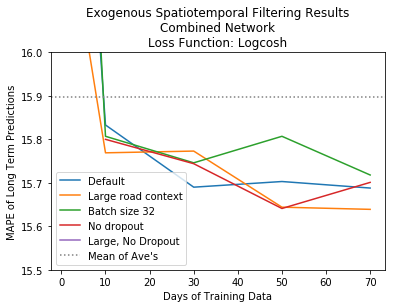

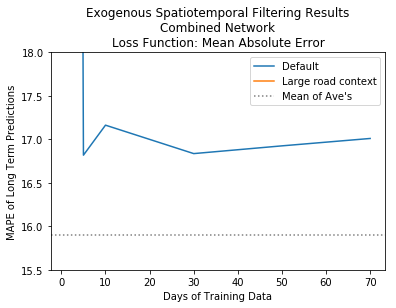

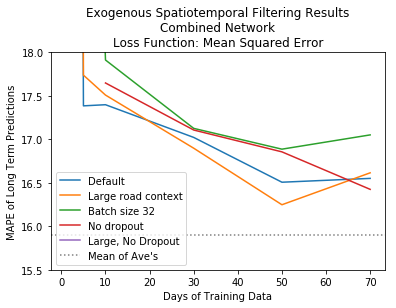

In [32]:
plot_combos([final, huge, minibatch, nodrop, huge_nodrop], ["Default", "Large road context", "Batch size 32", "No dropout", "Large, No Dropout"], True)

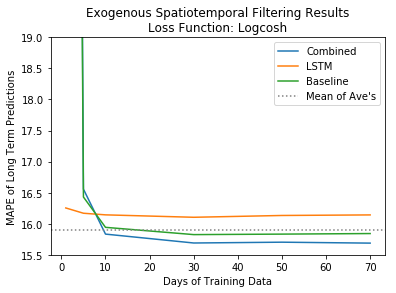

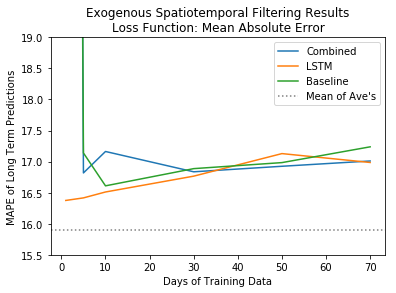

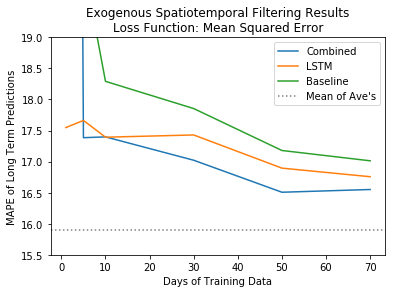

In [26]:
plot_graphs(final, save=True, filename="final")

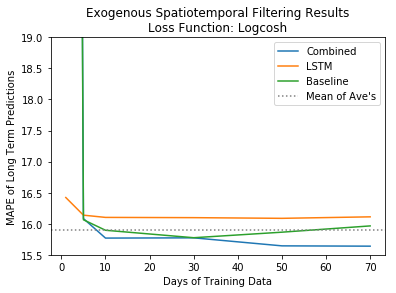

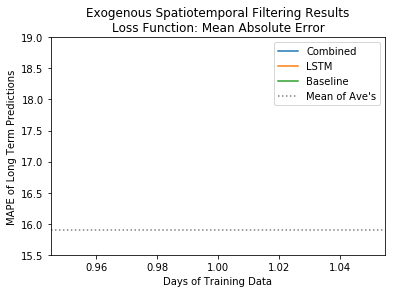

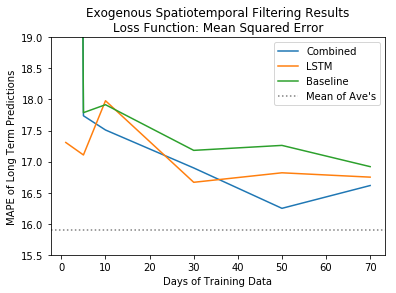

In [8]:
plot_graphs(huge)

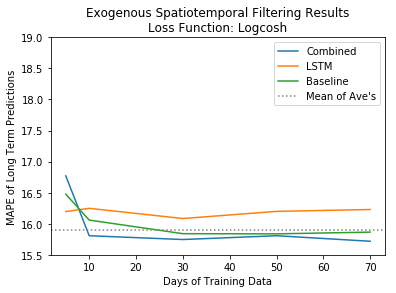

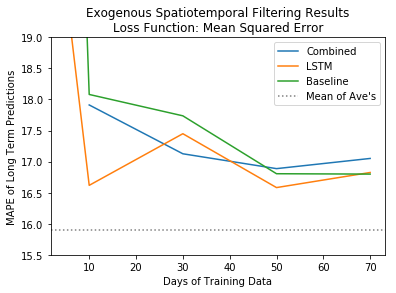

In [9]:
plot_graphs(minibatch)

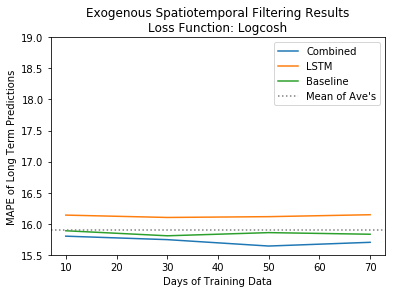

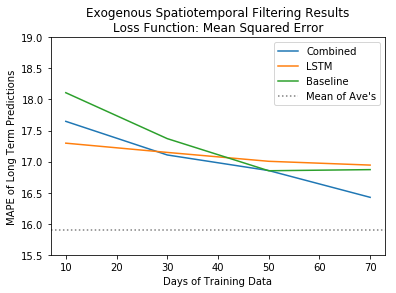

In [10]:
plot_graphs(nodrop)

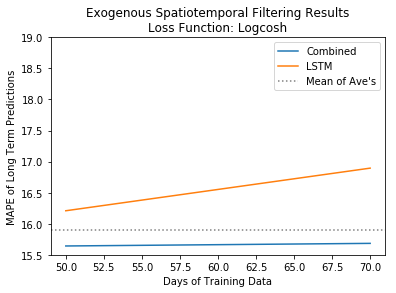

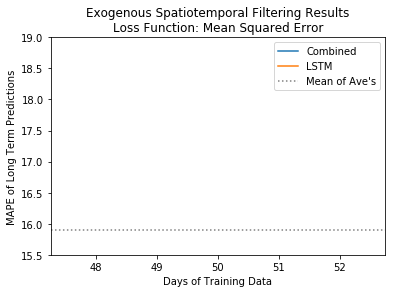

In [21]:
plot_graphs(conv)

In [18]:

final[final['days'] == 70].groupby("loss").mean()[['MAPE_long', 'RMSE_long', 'MAE_long', 'PW10_long']]

,MAPE_long,RMSE_long,MAE_long,PW10_long
loss,,,,
,16.991500,177.437500,111.144500,40.054500
logcosh,15.890667,165.756333,101.883333,42.430667
mean_absolute_error,17.078000,199.635667,123.029000,40.102333
mean_squared_error,16.773667,150.190000,96.816000,39.604333


In [12]:
 final.groupby("loss").min()[['MAPE_long', 'RMSE_long', 'MAE_long']]

,MAPE_long,RMSE_long,MAE_long
loss,,,
,16.956,151.165,97.600
logcosh,15.688,156.005,98.108
mean_absolute_error,16.375,169.101,105.058
mean_squared_error,16.507,147.604,95.941


In [27]:
 huge.groupby("loss").min()[['MAPE_long', 'RMSE_long', 'MAE_long']]

,MAPE_long,RMSE_long,MAE_long
loss,,,
,16.956,151.165,97.600
logcosh,15.639,153.337,97.339
mean_absolute_error,16.402,171.808,106.408
mean_squared_error,16.248,148.248,96.248


In [30]:
(15.897 - 15.639)/100 * 499.21479081476156

1.2879741603020893